## **Algoritmo A\* (A Star)**

El algoritmo **A\*** es un algoritmo de búsqueda que encuentra el camino más corto entre un nodo de inicio y uno objetivo, combinando lo mejor de **Dijkstra** (costo real) y **búsqueda heurística pura** (estimación hacia el objetivo).

Utiliza una función de evaluación:

`f(n) = g(n) + h(n)`

- `g(n)`: Costo desde el nodo de inicio hasta el nodo actual.
- `h(n)`: Estimación heurística del costo desde el nodo actual al objetivo.

![Descripción opcional](https://cdn.agenciasinc.es/var/ezwebin_site/storage/images/noticias/los-principales-partidos-politicos-espanoles-ya-utilizan-la-comunicacion-algoritmica/6340360-1-esl-MX/Los-principales-partidos-politicos-espanoles-ya-utilizan-la-comunicacion-algoritmica.gif)

### **💼 Aplicaciones en Ciencia de Datos y Negocios**

| Aplicación                                   | Descripción                                                                 |
|---------------------------------------------|-----------------------------------------------------------------------------|
| 📍 Optimización logística y de rutas         | Planeamiento de rutas de entrega, distribución o visitas a clientes.       |
| 🏭 Planificación de producción y procesos    | Encuentra la secuencia más eficiente de pasos en cadenas de producción.    |
| 📈 Análisis de flujos de trabajo             | Optimiza tareas en sistemas de gestión empresarial (ERP, CRM).             |


### **🎮 Aplicaciones en Videojuegos e Inteligencia Artificial**

| Aplicación                                   | Descripción                                                                 |
|---------------------------------------------|-----------------------------------------------------------------------------|
| 🎮 NPCs en videojuegos                       | Los personajes no jugables encuentran rutas óptimas para patrullar o atacar.|
| 🤖 Robótica y automatización                 | Navegación autónoma de robots evitando obstáculos.                         |
| 🧠 Sistemas expertos e IA general            | Encuentra soluciones en árboles de decisión complejos.                     |


### **✅ Ventajas**

- Encuentra el camino más corto si la heurística es admisible.
- Muy eficiente si se utiliza una heurística bien diseñada.
- Aplicable a muchos dominios: desde logística hasta videojuegos.

### **⚠️ Consideraciones**

- Su rendimiento depende en gran parte de la **calidad de la heurística**.
- Puede ser más lento en grafos muy grandes si hay muchos caminos posibles y la heurística no es informativa.




In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import math
import matplotlib

Optimal path: ['start', (0, 0), (1, 0), (2, 1), (3, 0), 'end']
Total cost: 37


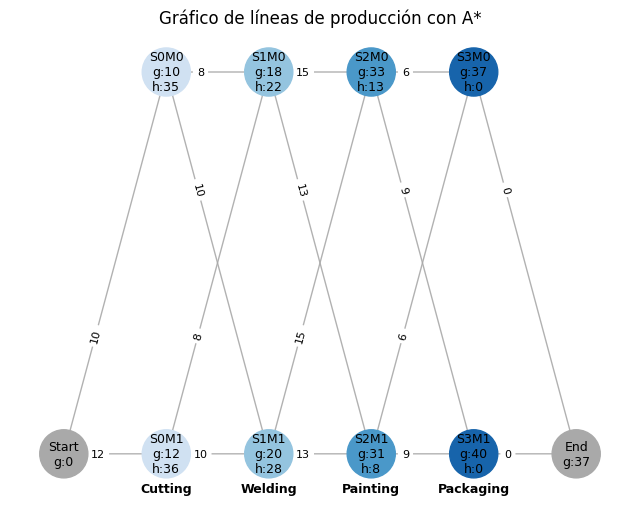

In [ ]:
# Ejemplo de costos: 4 etapas y 2 máquinas por etapa
machine_costs = [
    [10, 12],
    [8, 10],
    [15, 13],
    [6, 9]
]

stage_names = ['Cutting', 'Welding', 'Painting', 'Packaging']

estimated_remaining_time = [
    [35, 36],  # Desde etapa 0
    [22, 28],  # Desde etapa 1
    [13, 8],  # Desde etapa 2
    [0, 0]     # Etapa final
]

def build_complete_graph(costs):
    G = nx.DiGraph()
    stages = len(costs)
    machines_per_stage = len(costs[0])

    # Crear nodos: (stage, machine)
    for stage in range(stages):
        for machine in range(machines_per_stage):
            G.add_node((stage, machine))

    # Nodo inicial y final
    start = 'start'
    end = 'end'
    G.add_node(start)
    G.add_node(end)

    # Conectar start a todos los nodos de stage 0
    for m in range(machines_per_stage):
        G.add_edge(start, (0,m), weight=costs[0][m])

    # Conectar cada nodo con todos los de la siguiente etapa
    for stage in range(stages - 1):
        for m1 in range(machines_per_stage):
            for m2 in range(machines_per_stage):
                G.add_edge((stage, m1), (stage + 1, m2), weight=costs[stage+1][m2])

    # Conectar todos los nodos de la última etapa al nodo end
    for m in range(machines_per_stage):
        G.add_edge((stages - 1, m), end, weight=0)

    return G, start, end

def heuristic(node, end, stages, estimated_remaining_time):
    if node == 'start' or node == end:
        return 0
    stage, machine = node
    return estimated_remaining_time[stage][machine]

def a_star_on_graph(G, start, end, stages, estimated_remaining_time):
    import heapq

    open_set = []
    heapq.heappush(open_set, (0, start, [start], 0))  # (f, node, path, g)

    visited = {}
    g_scores = {start: 0}

    while open_set:
        f, current, path, g = heapq.heappop(open_set)

        if current == end:
            return path, g, g_scores

        if current in visited and visited[current] <= g:
            continue
        visited[current] = g

        for neighbor in G.neighbors(current):
            cost = G.edges[current, neighbor]['weight']
            g_new = g + cost

            if neighbor not in g_scores or g_new < g_scores[neighbor]:
                g_scores[neighbor] = g_new 
            
            h = heuristic(neighbor, end, stages, estimated_remaining_time)
            f_new = g_new + h
            heapq.heappush(open_set, (f_new, neighbor, path + [neighbor], g_new))

    return None, float('inf'), g_scores

def plot_graph(G, path, stages, machines_per_stage, stage_names, flg_best_path=False, g_scores=None):
    pos = {}
    # Layout por etapas y máquinas
    for stage in range(stages):
        for m in range(machines_per_stage):
            # X: etapa, Y: máquina (invertido para mejor visual)
            pos[(stage, m)] = (stage, machines_per_stage - m)

    # Posiciones para start y end
    pos['start'] = (-1, machines_per_stage/2)
    pos['end'] = (stages, machines_per_stage/2)

    plt.figure(figsize=(8,6))

    # Colores por etapa
    cmap = matplotlib.colormaps['Blues'].resampled(stages+2)
    node_colors = []
    for node in G.nodes:
        if node == 'start' or node == 'end':
            node_colors.append('darkgray')
        else:
            node_colors.append(cmap(node[0]+1))

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1200)

    # Dibujar todas las aristas en gris claro
    nx.draw_networkx_edges(G, pos, alpha=0.9, edge_color='darkgray')

    # Etiquetas nodos
    labels = {}
    for node in G.nodes:
        if node == 'start':
            g = g_scores.get(node, 0) if g_scores else 0
            labels[node] = f"Start\ng:{g}"
        elif node == 'end':
            g = g_scores.get(node, 0) if g_scores else 0
            labels[node] = f"End\ng:{g}"
        else:
            h = heuristic(node, 'end', stages, estimated_remaining_time)
            g = g_scores.get(node, 0) if g_scores else 0
            labels[node] = f"S{node[0]}M{node[1]}\ng:{g:.0f}\nh:{h:.0f}"
    
    nx.draw_networkx_labels(G, pos, labels, font_size=9)

    # Nombres de etapas
    for stage in range(stages):
        x = stage
        y = machines_per_stage - 1.1
        plt.text(x, y, stage_names[stage], fontsize=9, fontweight='bold', ha='center')
    
    if not flg_best_path:
        # Etiquetas de pesos de aristas
        edge_labels = {(u, v): G.edges[u, v]['weight'] for u, v in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.3)

    if flg_best_path:
        # Resaltar ruta óptima
        if path:
            edges_in_path = list(zip(path[:-1], path[1:]))
            nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=3)
            # nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=500)

    plt.title("Gráfico de líneas de producción con A*")
    plt.axis('off')
    plt.show()


stages = len(machine_costs)
machines_per_stage = len(machine_costs[0])

G, start, end = build_complete_graph(machine_costs)
optimal_path, total_cost, g_scores = a_star_on_graph(G, start, end, stages, estimated_remaining_time)

print("Optimal path:", optimal_path)
print("Total cost:", total_cost)

plot_graph(G, optimal_path, stages, machines_per_stage, stage_names,
           flg_best_path=False, g_scores=g_scores)


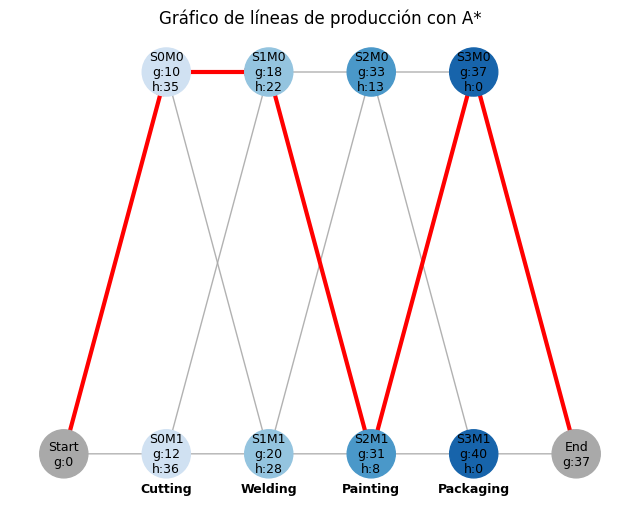

In [10]:
plot_graph(G, optimal_path, stages, machines_per_stage, stage_names,
           flg_best_path=True, g_scores=g_scores)

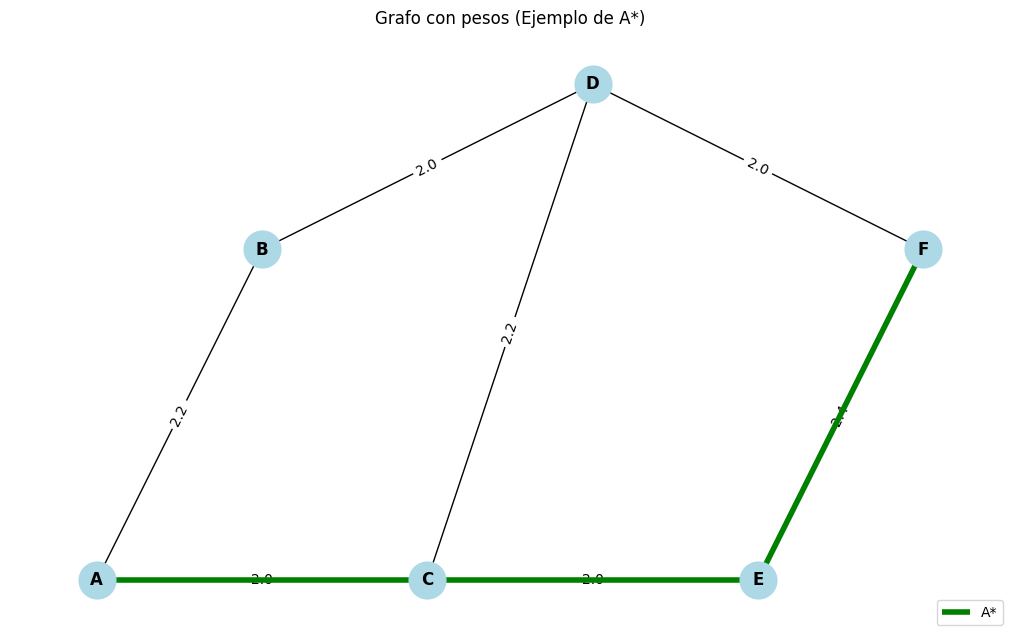

In [4]:
G = nx.Graph()

# Agregar nodos con coordenadas (para la heurística en A*)
positions = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 0),
    'D': (3, 3),
    'E': (4, 0),
    'F': (5, 2)
}

G.add_nodes_from(positions.keys())

# Aristas con pesos
edges = [
    ('A', 'B', 2.2),
    ('A', 'C', 2.0),
    ('B', 'D', 2.0),
    ('C', 'D', 2.2),
    ('C', 'E', 2.0),
    ('D', 'F', 2.0),
    ('E', 'F', 2.4)
]
G.add_weighted_edges_from(edges)

# Heurística: distancia euclidiana hasta el nodo objetivo
def heuristic(n, goal):
    x1, y1 = positions[n]
    x2, y2 = positions[goal]
    return math.hypot(x2 - x1, y2 - y1)

# A*
def a_star(graph, start, goal):
    heap = [(0 + heuristic(start, goal), 0, start, [])]
    visited = set()
    while heap:
        (f_cost, cost, node, path) = heapq.heappop(heap)
        if node in visited:
            continue
        path = path + [node]
        
        if node == goal:
            return path, cost
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                weight = graph[node][neighbor]['weight']
                g = cost + weight
                h = heuristic(neighbor, goal)
                heapq.heappush(heap, (g + h, g, neighbor, path))
    return [], float('inf')

a_path, a_cost = a_star(G, 'A', 'F')

# Visualizar resultados
plt.figure(figsize=(10, 6))
nx.draw(G, pos=positions, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels={(u, v): f"{w:.1f}" for (u, v, w) in edges})

# Resaltar caminos
def highlight_path(path, color, label):
    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]
        nx.draw_networkx_edges(G, pos=positions, edgelist=[(u, v)], width=4, edge_color=color, label=label if i == 0 else "")

highlight_path(a_path, 'green', 'A*')

plt.legend(loc='lower right')
plt.title("Grafo con pesos (Ejemplo de A*)")
plt.axis('off')
plt.show()
